In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [20]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import cv2

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [3]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

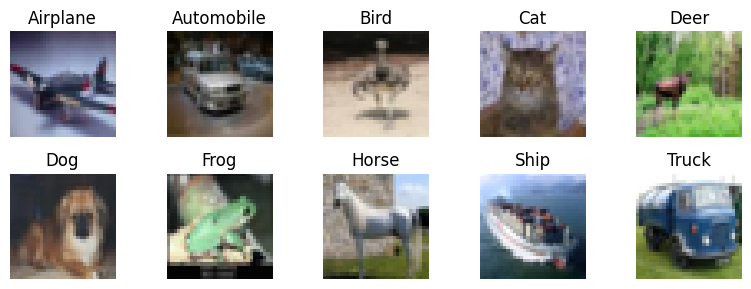

In [4]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [5]:
##################################################
################### YOUR CODES ###################
x_train = x_train.astype("float32") / 255
x_val = x_val  / 255
# one - hat 
y_val = to_categorical(y_val , 10)
y_train = to_categorical(y_train , 10)

##################################################

In [6]:
x_train.shape

(50000, 32, 32, 3)

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [7]:
##################################################
################### YOUR CODES ###################
model = keras.Sequential([
  keras.Input(shape=(32 , 32 , 3)),
  layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation="softmax")
])

##################################################

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [8]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [9]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)
##################################################

Epoch 1/10
352/352 [==============================] - 15s 9ms/step - loss: 1.6713 - accuracy: 0.3912 - val_loss: 1.4064 - val_accuracy: 0.4954
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 1.3183 - accuracy: 0.5274 - val_loss: 1.2470 - val_accuracy: 0.5606
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1575 - accuracy: 0.5881 - val_loss: 1.1155 - val_accuracy: 0.6028
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0411 - accuracy: 0.6332 - val_loss: 0.9936 - val_accuracy: 0.6574
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9589 - accuracy: 0.6666 - val_loss: 0.9764 - val_accuracy: 0.6602
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.8882 - accuracy: 0.6905 - val_loss: 0.8914 - val_accuracy: 0.6912
Epoch 7/10
352/352 [==============================] - 2s 6ms/step - loss: 0.8346 - accuracy: 0.7094 - val_loss: 0.8876 - val_accuracy: 0.6966
Epoch

This function plots the `loss` and `accuracy` of your model by the model's history.

In [10]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

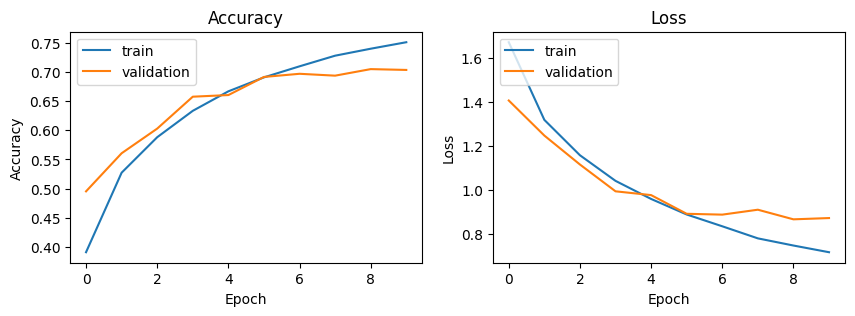

In [11]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [12]:
##################################################
################### YOUR CODES ###################
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
        keras.layers.experimental.preprocessing.RandomContrast(0.1),
    ]
)
model = keras.Sequential([
  keras.Input(shape=(32 , 32 , 3)),
  data_augmentation ,
  layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation="softmax")
])

##################################################

In [13]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

In [14]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)
##################################################

Epoch 1/10
352/352 [==============================] - 5s 8ms/step - loss: 1.7610 - accuracy: 0.3620 - val_loss: 1.5045 - val_accuracy: 0.4452
Epoch 2/10
352/352 [==============================] - 3s 10ms/step - loss: 1.4793 - accuracy: 0.4696 - val_loss: 1.4210 - val_accuracy: 0.4788
Epoch 3/10
352/352 [==============================] - 2s 7ms/step - loss: 1.3640 - accuracy: 0.5142 - val_loss: 1.2353 - val_accuracy: 0.5552
Epoch 4/10
352/352 [==============================] - 2s 7ms/step - loss: 1.2993 - accuracy: 0.5391 - val_loss: 1.2263 - val_accuracy: 0.5660
Epoch 5/10
352/352 [==============================] - 3s 8ms/step - loss: 1.2238 - accuracy: 0.5678 - val_loss: 1.1915 - val_accuracy: 0.5806
Epoch 6/10
352/352 [==============================] - 3s 10ms/step - loss: 1.1761 - accuracy: 0.5886 - val_loss: 1.0894 - val_accuracy: 0.6236
Epoch 7/10
352/352 [==============================] - 3s 8ms/step - loss: 1.1359 - accuracy: 0.5981 - val_loss: 1.1473 - val_accuracy: 0.6024
Epoc

Let's see your model performance with augmentation.

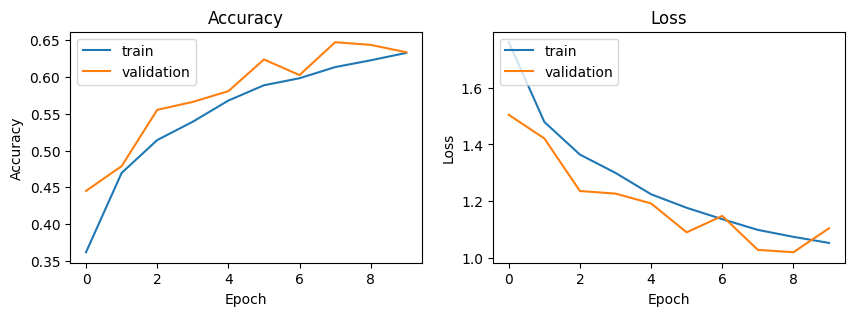

In [15]:
plot_acc_loss(history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [24]:
size = (224, 224)
ds_train = tf.data.Dataset.from_tensor_slices(x_train)
ds_val = tf.data.Dataset.from_tensor_slices(x_val)
train_ds = ds_train.map(lambda x: tf.image.resize(x, size))
validation_ds = ds_val.map(lambda x: tf.image.resize(x, size))

In [26]:
base_model = keras.applications.ResNet50V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False) 
base_model.trainable = False


94668760/94668760 [==============================] - 1s 0us/step


In [27]:
inputs = keras.Input(shape=(224, 224, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


## Use only the first three blocks (`extra bonus`)